# Phase 2: Data Cleaning Pipeline
## Rwanda Polytechnic Multi-Campus Data Preprocessing

**Objective:** Clean the raw combined datasets by handling:
1. Missing values
2. Duplicates
3. Outliers
4. Inconsistent formats
5. Noisy data

**Input:** Raw combined datasets from Phase 1

**Output:** Cleaned datasets with before/after metrics

---
## Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("PHASE 2: DATA CLEANING PIPELINE")
print("="*60)

PHASE 2: DATA CLEANING PIPELINE


---
## Load Raw Combined Data

In [2]:
# Load the raw combined datasets from Phase 1
print("\nLoading raw combined datasets...")

students_df = pd.read_csv('outputs/students_raw_combined.csv')
courses_df = pd.read_csv('outputs/courses_raw_combined.csv')
assessments_df = pd.read_csv('outputs/assessments_raw_combined.csv')

print(f"✓ Students: {len(students_df)} records")
print(f"✓ Courses: {len(courses_df)} records")
print(f"✓ Assessments: {len(assessments_df)} records")

# Display first few rows
print("\nStudents sample:")
students_df.head()


Loading raw combined datasets...
✓ Students: 607 records
✓ Courses: 75 records
✓ Assessments: 6110 records

Students sample:


,Student_ID,First_Name,Last_Name,Gender,DOB,Phone,Email,Program,Level,Intake_Year,Campus_Name,Campus_ID,Source_Campus_File,Upload_Date
0,RPH0001,Grace,Uwimana,Male,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,Business Administration,1,2023,Huye,1,Huye_students.csv,2026-02-11 15:07:01.640074
1,RPH0002,Claire,Uwimana,Female,2004-04-15,2.507209e+11,claire.uwimana@rp.ac.rw,Civil Engineering,3,2024,Huye,1,Huye_students.csv,2026-02-11 15:07:01.640074
2,RPH0003,Kevin,Bizimana,Female,20/06/2003,2.507258e+11,kevin.bizimana@rp.ac.rw,Architecture,1,2025,Huye,1,Huye_students.csv,2026-02-11 15:07:01.640074
3,RPH0004,Esther,Nsengiyumva,Male,2003-10-07,2.507262e+11,esther.nsengiyumva@rp.ac.rw,Architecture,3,2022,Huye,1,Huye_students.csv,2026-02-11 15:07:01.640074
4,RPH0005,Gloria,Habimana,FEMALE,2003-03-12,2.507481e+11,gloria.habimana@rp.ac.rw,Architecture,1,2023,Huye,1,Huye_students.csv,2026-02-11 15:07:01.640074


In [3]:
print("Courses sample:")
courses_df.head()

Courses sample:


,Course_Code,Course_Title,Credits,Program,Level,Semester,Campus_Name,Campus_ID,Source_Campus_File,Upload_Date
0,ICT101,Programming Fundamentals,4.0,Information Technology,1,1,Huye,1,Huye_courses.csv,2026-02-11 15:07:01.649965
1,ICT102,Database Systems,4.0,Information Technology,1,2,Huye,1,Huye_courses.csv,2026-02-11 15:07:01.649965
2,ICT103,Web Development,3.0,Information Technology,1,2,Huye,1,Huye_courses.csv,2026-02-11 15:07:01.649965
3,ICT201,Data Structures,4.0,Information Technology,1,1,Huye,1,Huye_courses.csv,2026-02-11 15:07:01.649965
4,ict202,Network Security,3.0,Information Technology,1,1,Huye,1,Huye_courses.csv,2026-02-11 15:07:01.649965


In [4]:
print("Assessments sample:")
assessments_df.head()

Assessments sample:


,Student_ID,Course_Code,Assessment_Type,Mark,Assessment_Date,Academic_Year,Semester,Attendance_Rate,Campus_Name,Campus_ID,Source_Campus_File,Upload_Date
0,RPH0001,-B-A-1-0-3-,Quiz,63.1,2025-06-16,2024/2025,2,82.1,Huye,1,Huye_assessments.csv,2026-02-11 15:07:01.659965
1,RPH0001,-B-A-1-0-3-,CAT,NaN,13/09/2025,2025/2026,2,69.7,Huye,1,Huye_assessments.csv,2026-02-11 15:07:01.659965
2,RPH0001,BA201,Project,65.9,2025-11-01,2025/2026,1,97.3,Huye,1,Huye_assessments.csv,2026-02-11 15:07:01.659965
3,RPH0001,BA201,CAT,100.0,2025-08-16,2025/2026,1,60.1,Huye,1,Huye_assessments.csv,2026-02-11 15:07:01.659965
4,RPH0001,BA201,Quiz,71.1,05/09/2025,2023/2024,1,69.5,Huye,1,Huye_assessments.csv,2026-02-11 15:07:01.659965


---
## 1. MISSING DATA ANALYSIS AND TREATMENT

### 1.1 Visualize Missing Data

1. MISSING DATA ANALYSIS


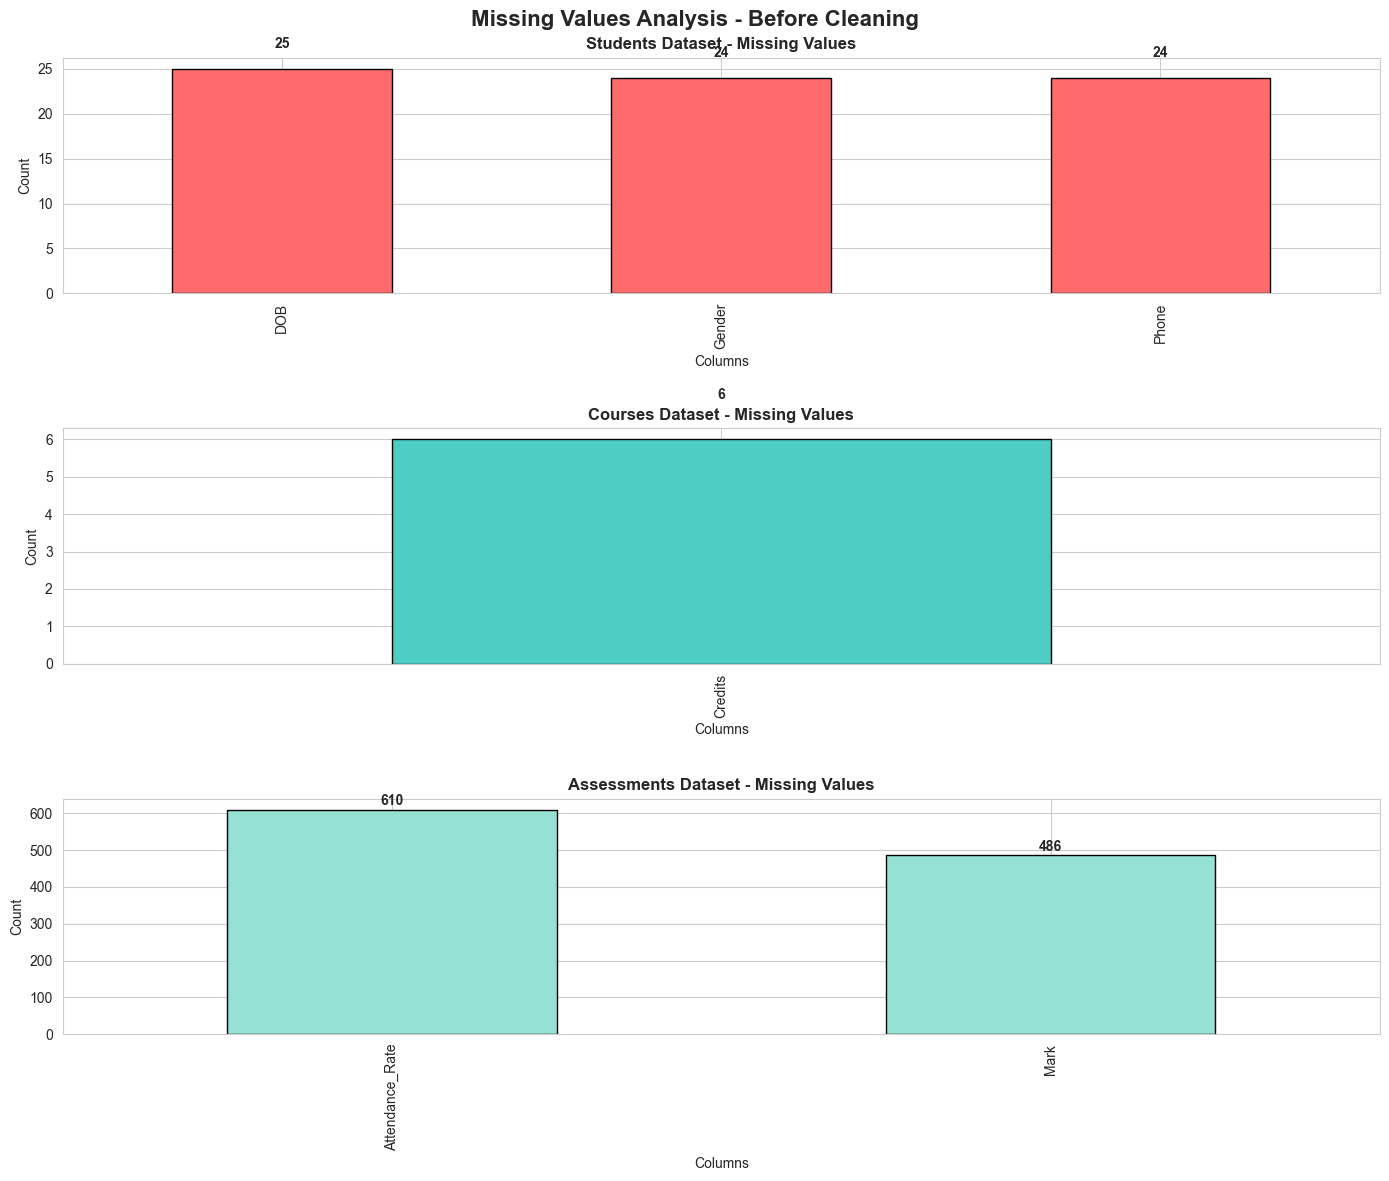


✓ Saved visualization: outputs/02_missing_values_before.png


In [5]:
print("="*60)
print("1. MISSING DATA ANALYSIS")
print("="*60)

# Create figure with subplots for all datasets
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Missing Values Analysis - Before Cleaning', fontsize=16, fontweight='bold')

# Students missing data
students_missing = students_df.isnull().sum()
students_missing = students_missing[students_missing > 0].sort_values(ascending=False)
if len(students_missing) > 0:
    students_missing.plot(kind='bar', ax=axes[0], color='#FF6B6B', edgecolor='black')
    axes[0].set_title('Students Dataset - Missing Values', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=10)
    axes[0].set_xlabel('Columns', fontsize=10)
    for i, v in enumerate(students_missing.values):
        axes[0].text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Courses missing data
courses_missing = courses_df.isnull().sum()
courses_missing = courses_missing[courses_missing > 0].sort_values(ascending=False)
if len(courses_missing) > 0:
    courses_missing.plot(kind='bar', ax=axes[1], color='#4ECDC4', edgecolor='black')
    axes[1].set_title('Courses Dataset - Missing Values', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Count', fontsize=10)
    axes[1].set_xlabel('Columns', fontsize=10)
    for i, v in enumerate(courses_missing.values):
        axes[1].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Assessments missing data
assessments_missing = assessments_df.isnull().sum()
assessments_missing = assessments_missing[assessments_missing > 0].sort_values(ascending=False)
if len(assessments_missing) > 0:
    assessments_missing.plot(kind='bar', ax=axes[2], color='#95E1D3', edgecolor='black')
    axes[2].set_title('Assessments Dataset - Missing Values', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('Count', fontsize=10)
    axes[2].set_xlabel('Columns', fontsize=10)
    for i, v in enumerate(assessments_missing.values):
        axes[2].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/02_missing_values_before.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved visualization: outputs/02_missing_values_before.png")

### 1.2 Missing Data Statistics

In [6]:
# Calculate missing percentages
print("\nMissing Data Statistics:")
print("\n--- STUDENTS ---")
students_missing_pct = (students_df.isnull().sum() / len(students_df)) * 100
students_missing_summary = pd.DataFrame({
    'Missing_Count': students_df.isnull().sum(),
    'Missing_Percentage': students_missing_pct.round(2)
})
print(students_missing_summary[students_missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

print("\n--- COURSES ---")
courses_missing_pct = (courses_df.isnull().sum() / len(courses_df)) * 100
courses_missing_summary = pd.DataFrame({
    'Missing_Count': courses_df.isnull().sum(),
    'Missing_Percentage': courses_missing_pct.round(2)
})
print(courses_missing_summary[courses_missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

print("\n--- ASSESSMENTS ---")
assessments_missing_pct = (assessments_df.isnull().sum() / len(assessments_df)) * 100
assessments_missing_summary = pd.DataFrame({
    'Missing_Count': assessments_df.isnull().sum(),
    'Missing_Percentage': assessments_missing_pct.round(2)
})
print(assessments_missing_summary[assessments_missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))


Missing Data Statistics:

--- STUDENTS ---
        Missing_Count  Missing_Percentage
DOB                25                4.12
Gender             24                3.95
Phone              24                3.95

--- COURSES ---
         Missing_Count  Missing_Percentage
Credits              6                 8.0

--- ASSESSMENTS ---
                 Missing_Count  Missing_Percentage
Attendance_Rate            610                9.98
Mark                       486                7.95


### 1.3 Impute Missing Values

In [7]:
print("\n" + "="*60)
print("IMPUTING MISSING VALUES")
print("="*60)

# Store before counts
before_missing_students = students_df.isnull().sum().sum()
before_missing_courses = courses_df.isnull().sum().sum()
before_missing_assessments = assessments_df.isnull().sum().sum()

# STUDENTS IMPUTATION
print("\n--- Imputing Students Dataset ---")

# Gender: Mode (most common value)
if students_df['Gender'].isnull().sum() > 0:
    mode_gender = students_df['Gender'].mode()[0]
    students_df['Gender'].fillna(mode_gender, inplace=True)
    print(f"✓ Gender: Filled {students_df['Gender'].isnull().sum()} missing values with mode '{mode_gender}'")

# Phone: Keep as NaN (not critical for analysis)
print(f"✓ Phone: Keeping {students_df['Phone'].isnull().sum()} missing values as NaN (not critical)")

# DOB: Keep as NaN or could impute with median birth year if needed
print(f"✓ DOB: Keeping {students_df['DOB'].isnull().sum()} missing values as NaN")

# Email: Keep as NaN
if 'Email' in students_df.columns:
    print(f"✓ Email: Keeping {students_df['Email'].isnull().sum()} missing values as NaN")


IMPUTING MISSING VALUES

--- Imputing Students Dataset ---
✓ Gender: Filled 24 missing values with mode 'F'
✓ Phone: Keeping 24 missing values as NaN (not critical)
✓ DOB: Keeping 25 missing values as NaN
✓ Email: Keeping 0 missing values as NaN


In [8]:
# COURSES IMPUTATION
print("\n--- Imputing Courses Dataset ---")

# Credits: Fill with median credits by program
if courses_df['Credits'].isnull().sum() > 0:
    credits_missing_before = courses_df['Credits'].isnull().sum()
    courses_df['Credits'] = courses_df.groupby('Program')['Credits'].transform(
        lambda x: x.fillna(x.median())
    )
    # If still missing (entire program missing), use overall median
    courses_df['Credits'].fillna(courses_df['Credits'].median(), inplace=True)
    print(f"✓ Credits: Filled {credits_missing_before} missing values with median by program")


--- Imputing Courses Dataset ---
✓ Credits: Filled 6 missing values with median by program


In [9]:
# ASSESSMENTS IMPUTATION
print("\n--- Imputing Assessments Dataset ---")

# Marks: Fill with median by course (more robust than mean)
if assessments_df['Mark'].isnull().sum() > 0:
    marks_missing_before = assessments_df['Mark'].isnull().sum()
    assessments_df['Mark'] = assessments_df.groupby('Course_Code')['Mark'].transform(
        lambda x: x.fillna(x.median())
    )
    # If still missing (entire course missing marks), use overall median
    assessments_df['Mark'].fillna(assessments_df['Mark'].median(), inplace=True)
    print(f"✓ Marks: Filled {marks_missing_before} missing values with median by course")

# Attendance Rate: Fill with mean by campus
if 'Attendance_Rate' in assessments_df.columns and assessments_df['Attendance_Rate'].isnull().sum() > 0:
    attendance_missing_before = assessments_df['Attendance_Rate'].isnull().sum()
    assessments_df['Attendance_Rate'] = assessments_df.groupby('Campus_Name')['Attendance_Rate'].transform(
        lambda x: x.fillna(x.mean())
    )
    # If still missing, use overall mean
    assessments_df['Attendance_Rate'].fillna(assessments_df['Attendance_Rate'].mean(), inplace=True)
    print(f"✓ Attendance_Rate: Filled {attendance_missing_before} missing values with mean by campus")

# After counts
after_missing_students = students_df.isnull().sum().sum()
after_missing_courses = courses_df.isnull().sum().sum()
after_missing_assessments = assessments_df.isnull().sum().sum()

print("\n" + "="*60)
print("IMPUTATION SUMMARY")
print("="*60)
print(f"Students: {before_missing_students} → {after_missing_students} missing values")
print(f"Courses: {before_missing_courses} → {after_missing_courses} missing values")
print(f"Assessments: {before_missing_assessments} → {after_missing_assessments} missing values")


--- Imputing Assessments Dataset ---
✓ Marks: Filled 486 missing values with median by course
✓ Attendance_Rate: Filled 610 missing values with mean by campus

IMPUTATION SUMMARY
Students: 73 → 73 missing values
Courses: 6 → 0 missing values
Assessments: 1096 → 0 missing values


---
## 2. DUPLICATE DETECTION AND REMOVAL

In [10]:
print("\n" + "="*60)
print("2. DUPLICATE DETECTION AND REMOVAL")
print("="*60)

# STUDENTS DUPLICATES
print("\n--- Students Dataset ---")
students_dupes_before = students_df.duplicated(subset=['Student_ID']).sum()
print(f"Duplicates by Student_ID (before): {students_dupes_before}")

if students_dupes_before > 0:
    # Show some duplicate examples
    print("\nExample duplicate Student_IDs:")
    duplicate_ids = students_df[students_df.duplicated(subset=['Student_ID'], keep=False)]['Student_ID'].unique()[:5]
    for dup_id in duplicate_ids:
        print(f"  {dup_id}: {students_df[students_df['Student_ID'] == dup_id].shape[0]} records")
    
    # Remove duplicates - keep the most recent upload
    students_df['Upload_Date'] = pd.to_datetime(students_df['Upload_Date'])
    students_df = students_df.sort_values('Upload_Date').drop_duplicates(
        subset=['Student_ID'],
        keep='last'
    )
    print(f"\n✓ Removed {students_dupes_before} duplicate students (kept most recent upload)")

students_dupes_after = students_df.duplicated(subset=['Student_ID']).sum()
print(f"Duplicates by Student_ID (after): {students_dupes_after}")


2. DUPLICATE DETECTION AND REMOVAL

--- Students Dataset ---
Duplicates by Student_ID (before): 18

Example duplicate Student_IDs:
  RPH0073: 2 records
  RPH0074: 2 records
  RPH0086: 2 records
  RPH0212: 2 records
  RPH0216: 2 records



✓ Removed 18 duplicate students (kept most recent upload)
Duplicates by Student_ID (after): 0


In [11]:
# COURSES DUPLICATES
print("\n--- Courses Dataset ---")
courses_dupes_before = courses_df.duplicated(subset=['Course_Code', 'Campus_Name']).sum()
print(f"Duplicates by (Course_Code, Campus) (before): {courses_dupes_before}")

if courses_dupes_before > 0:
    courses_df['Upload_Date'] = pd.to_datetime(courses_df['Upload_Date'])
    courses_df = courses_df.sort_values('Upload_Date').drop_duplicates(
        subset=['Course_Code', 'Campus_Name'],
        keep='last'
    )
    print(f"✓ Removed {courses_dupes_before} duplicate courses")

courses_dupes_after = courses_df.duplicated(subset=['Course_Code', 'Campus_Name']).sum()
print(f"Duplicates by (Course_Code, Campus) (after): {courses_dupes_after}")


--- Courses Dataset ---
Duplicates by (Course_Code, Campus) (before): 0
Duplicates by (Course_Code, Campus) (after): 0


In [12]:
# ASSESSMENTS DUPLICATES
print("\n--- Assessments Dataset ---")
assessments_dupes_before = assessments_df.duplicated(
    subset=['Student_ID', 'Course_Code', 'Academic_Year', 'Semester', 'Assessment_Type']
).sum()
print(f"Duplicates by (Student_ID, Course_Code, Year, Semester, Type) (before): {assessments_dupes_before}")

if assessments_dupes_before > 0:
    # Show some examples
    print("\nExample duplicate assessments:")
    dup_mask = assessments_df.duplicated(
        subset=['Student_ID', 'Course_Code', 'Academic_Year', 'Semester', 'Assessment_Type'],
        keep=False
    )
    print(assessments_df[dup_mask][['Student_ID', 'Course_Code', 'Assessment_Type', 'Mark']].head(10))
    
    # Remove duplicates - keep the most recent upload
    assessments_df['Upload_Date'] = pd.to_datetime(assessments_df['Upload_Date'])
    assessments_df = assessments_df.sort_values('Upload_Date').drop_duplicates(
        subset=['Student_ID', 'Course_Code', 'Academic_Year', 'Semester', 'Assessment_Type'],
        keep='last'
    )
    print(f"\n✓ Removed {assessments_dupes_before} duplicate assessments")

assessments_dupes_after = assessments_df.duplicated(
    subset=['Student_ID', 'Course_Code', 'Academic_Year', 'Semester', 'Assessment_Type']
).sum()
print(f"Duplicates by (Student_ID, Course_Code, Year, Semester, Type) (after): {assessments_dupes_after}")


--- Assessments Dataset ---
Duplicates by (Student_ID, Course_Code, Year, Semester, Type) (before): 205

Example duplicate assessments:
    Student_ID  Course_Code Assessment_Type  Mark
101    RPH0011       ICT201             CAT  65.4
102    RPH0011       ICT201             CAT  80.5
137    RPH0014       ICT301            Exam  79.1
157    RPH0016        CE102            Quiz  83.2
158    RPH0016        CE102            Quiz  62.8
161    RPH0016        CE201      Assignment  47.8
162    RPH0016        CE201      Assignment  56.0
197    RPH0020  -B-A-1-0-3-         Project  78.0
198    RPH0020  -B-A-1-0-3-         Project  72.1
209    RPH0021        BA101         Project  64.9

✓ Removed 205 duplicate assessments
Duplicates by (Student_ID, Course_Code, Year, Semester, Type) (after): 0


---
## 3. OUTLIER DETECTION AND TREATMENT

### 3.1 Detect Outliers in Marks

In [13]:
print("\n" + "="*60)
print("3. OUTLIER DETECTION AND TREATMENT")
print("="*60)

print("\n--- Marks Outlier Analysis ---")

# Calculate outliers using IQR method
Q1 = assessments_df['Mark'].quantile(0.25)
Q3 = assessments_df['Mark'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound (Q1 - 1.5*IQR): {Q1 - 1.5*IQR:.2f}")
print(f"Upper bound (Q3 + 1.5*IQR): {Q3 + 1.5*IQR:.2f}")

# Detect outliers
outliers_iqr = (assessments_df['Mark'] < (Q1 - 1.5*IQR)) | (assessments_df['Mark'] > (Q3 + 1.5*IQR))
outliers_invalid = (assessments_df['Mark'] < 0) | (assessments_df['Mark'] > 100)

print(f"\nOutliers by IQR method: {outliers_iqr.sum()}")
print(f"Invalid marks (< 0 or > 100): {outliers_invalid.sum()}")

# Show distribution
print(f"\nMarks below 0: {(assessments_df['Mark'] < 0).sum()}")
print(f"Marks above 100: {(assessments_df['Mark'] > 100).sum()}")
print(f"Marks in valid range [0-100]: {((assessments_df['Mark'] >= 0) & (assessments_df['Mark'] <= 100)).sum()}")


3. OUTLIER DETECTION AND TREATMENT

--- Marks Outlier Analysis ---
Q1 (25th percentile): 55.60
Q3 (75th percentile): 74.80
IQR: 19.20
Lower bound (Q1 - 1.5*IQR): 26.80
Upper bound (Q3 + 1.5*IQR): 103.60

Outliers by IQR method: 306
Invalid marks (< 0 or > 100): 287

Marks below 0: 145
Marks above 100: 142
Marks in valid range [0-100]: 5618


### 3.2 Visualize Outliers

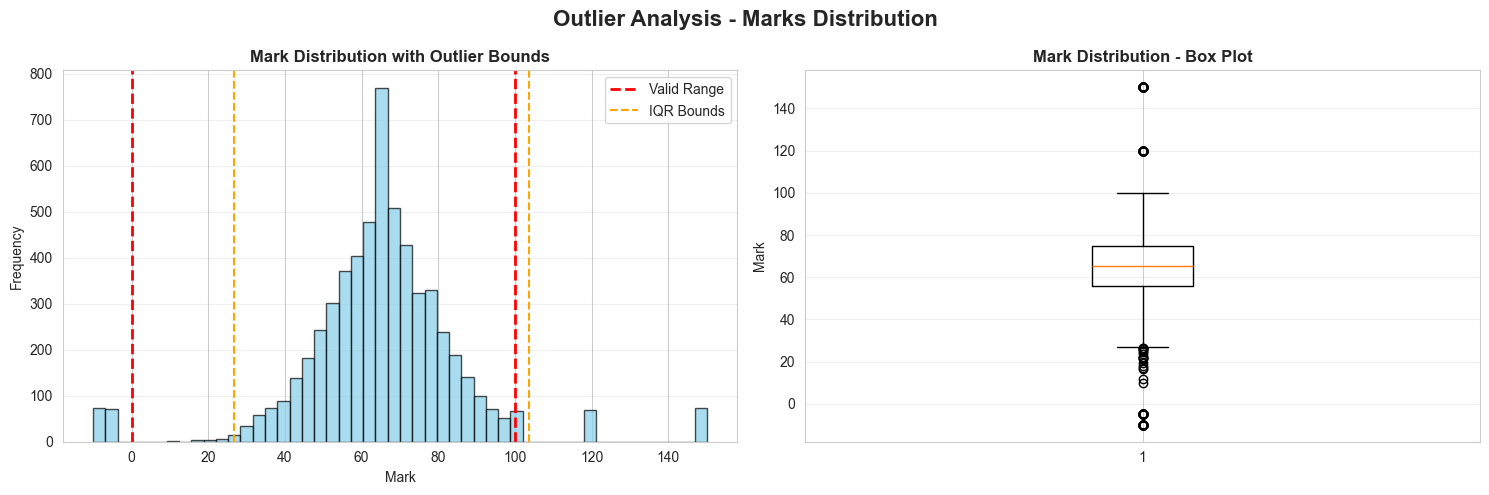


✓ Saved visualization: outputs/02_outliers_before.png


In [14]:
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Outlier Analysis - Marks Distribution', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(assessments_df['Mark'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Valid Range')
axes[0].axvline(100, color='red', linestyle='--', linewidth=2)
axes[0].axvline(Q1 - 1.5*IQR, color='orange', linestyle='--', linewidth=1.5, label='IQR Bounds')
axes[0].axvline(Q3 + 1.5*IQR, color='orange', linestyle='--', linewidth=1.5)
axes[0].set_title('Mark Distribution with Outlier Bounds', fontweight='bold')
axes[0].set_xlabel('Mark')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(assessments_df['Mark'], vert=True)
axes[1].set_title('Mark Distribution - Box Plot', fontweight='bold')
axes[1].set_ylabel('Mark')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/02_outliers_before.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved visualization: outputs/02_outliers_before.png")

### 3.3 Treat Outliers

In [15]:
print("\n--- Treating Outliers ---")

# Count before treatment
marks_below_0_before = (assessments_df['Mark'] < 0).sum()
marks_above_100_before = (assessments_df['Mark'] > 100).sum()

# Cap marks to 0-100 range
assessments_df.loc[assessments_df['Mark'] > 100, 'Mark'] = 100
assessments_df.loc[assessments_df['Mark'] < 0, 'Mark'] = 0

print(f"✓ Capped {marks_above_100_before} marks above 100 to 100")
print(f"✓ Capped {marks_below_0_before} marks below 0 to 0")

# Verify
marks_below_0_after = (assessments_df['Mark'] < 0).sum()
marks_above_100_after = (assessments_df['Mark'] > 100).sum()

print(f"\nAfter treatment:")
print(f"  Marks below 0: {marks_below_0_after}")
print(f"  Marks above 100: {marks_above_100_after}")
print(f"  All marks now in valid range: {((assessments_df['Mark'] >= 0) & (assessments_df['Mark'] <= 100)).all()}")


--- Treating Outliers ---
✓ Capped 142 marks above 100 to 100
✓ Capped 145 marks below 0 to 0

After treatment:
  Marks below 0: 0
  Marks above 100: 0
  All marks now in valid range: True


In [16]:
# Outliers in Credits
print("\n--- Credits Outlier Check ---")
print(f"Credits range: {courses_df['Credits'].min()} to {courses_df['Credits'].max()}")
print(f"Credits with value 0 or negative: {(courses_df['Credits'] <= 0).sum()}")

if (courses_df['Credits'] <= 0).sum() > 0:
    print("✓ Removing courses with invalid credits")
    courses_df = courses_df[courses_df['Credits'] > 0]
    print(f"  Remaining courses: {len(courses_df)}")


--- Credits Outlier Check ---
Credits range: 3.0 to 5.0
Credits with value 0 or negative: 0


---
## 4. INCONSISTENT FORMATS STANDARDIZATION

### 4.1 Standardize Dates

In [17]:
print("\n" + "="*60)
print("4. INCONSISTENT FORMATS STANDARDIZATION")
print("="*60)

print("\n--- Standardizing Dates ---")

# Show date format issues
print("\nDate formats before standardization:")
print("Sample DOB values:")
print(students_df['DOB'].head(10))

print("\nSample Assessment_Date values:")
print(assessments_df['Assessment_Date'].head(10))

# Standardize dates
students_df['DOB'] = pd.to_datetime(students_df['DOB'], errors='coerce')
assessments_df['Assessment_Date'] = pd.to_datetime(assessments_df['Assessment_Date'], errors='coerce')

# Check for any dates that couldn't be parsed
dob_null = students_df['DOB'].isnull().sum()
assessment_date_null = assessments_df['Assessment_Date'].isnull().sum()

print(f"\n✓ Standardized DOB to datetime (unparseable: {dob_null})")
print(f"✓ Standardized Assessment_Date to datetime (unparseable: {assessment_date_null})")

print("\nAfter standardization:")
print("Sample DOB values:")
print(students_df['DOB'].head(10))


4. INCONSISTENT FORMATS STANDARDIZATION

--- Standardizing Dates ---

Date formats before standardization:
Sample DOB values:
0      2000-12-04
143    2005-01-12
144    2001-12-02
145    2001-01-15
146    1998-12-05
147    2003-11-25
148    2005-06-16
149    2000-05-02
150    04/03/2002
151    2000-01-18
Name: DOB, dtype: str

Sample Assessment_Date values:
0       2025-06-16
1488    2025-08-09
1487    2025-08-17
1486    2025-03-16
1485    2025-12-10
1484    2025-02-24
1483    2025-07-15
1482    2025-04-30
1481    2025-06-30
1480    2025-09-13
Name: Assessment_Date, dtype: str

✓ Standardized DOB to datetime (unparseable: 92)
✓ Standardized Assessment_Date to datetime (unparseable: 1173)

After standardization:
Sample DOB values:
0     2000-12-04
143   2005-01-12
144   2001-12-02
145   2001-01-15
146   1998-12-05
147   2003-11-25
148   2005-06-16
149   2000-05-02
150          NaT
151   2000-01-18
Name: DOB, dtype: datetime64[us]


### 4.2 Standardize Text Fields

In [18]:
print("\n--- Standardizing Text Fields ---")

# GENDER standardization
print("\nGender values before standardization:")
print(students_df['Gender'].value_counts())

students_df['Gender'] = students_df['Gender'].str.upper().str.strip()
students_df['Gender'] = students_df['Gender'].replace({
    'M': 'MALE',
    'F': 'FEMALE'
})

print("\nGender values after standardization:")
print(students_df['Gender'].value_counts())
print("✓ Standardized Gender to MALE/FEMALE")


--- Standardizing Text Fields ---

Gender values before standardization:
Gender
F         82
f         81
m         71
Female    70
MALE      70
Male      69
M         63
FEMALE    61
Name: count, dtype: int64

Gender values after standardization:
Gender
FEMALE    294
MALE      273
Name: count, dtype: int64
✓ Standardized Gender to MALE/FEMALE


In [19]:
# COURSE CODE standardization
print("\n--- Standardizing Course Codes ---")
print("\nCourse codes before standardization (sample):")
print(courses_df['Course_Code'].head(10))

courses_df['Course_Code'] = courses_df['Course_Code'].str.upper().str.strip()
# Remove hyphens and spaces for consistency
courses_df['Course_Code'] = courses_df['Course_Code'].str.replace('-', '').str.replace(' ', '')

# Also standardize in assessments
assessments_df['Course_Code'] = assessments_df['Course_Code'].str.upper().str.strip()
assessments_df['Course_Code'] = assessments_df['Course_Code'].str.replace('-', '').str.replace(' ', '')

print("\nCourse codes after standardization (sample):")
print(courses_df['Course_Code'].head(10))
print("✓ Standardized Course_Code to uppercase, removed hyphens/spaces")


--- Standardizing Course Codes ---

Course codes before standardization (sample):
0    ICT101
1    ICT102
2    ICT103
3    ICT201
4    ict202
5    ICT301
6     CE101
7     CE102
8     CE103
9     CE201
Name: Course_Code, dtype: str

Course codes after standardization (sample):
0    ICT101
1    ICT102
2    ICT103
3    ICT201
4    ICT202
5    ICT301
6     CE101
7     CE102
8     CE103
9     CE201
Name: Course_Code, dtype: str
✓ Standardized Course_Code to uppercase, removed hyphens/spaces


In [20]:
# PROGRAM standardization
print("\n--- Standardizing Program Names ---")
print("\nProgram names before standardization:")
print(students_df['Program'].value_counts())

students_df['Program'] = students_df['Program'].str.title().str.strip()
courses_df['Program'] = courses_df['Program'].str.title().str.strip()

print("\nProgram names after standardization:")
print(students_df['Program'].value_counts())
print("✓ Standardized Program to Title Case")


--- Standardizing Program Names ---

Program names before standardization:
Program
Electrical Engineering         102
Business Administration         95
Information Technology          94
Civil Engineering               83
Architecture                    81
Tourism and Hospitality         77
  Information Technology        16
  Civil Engineering             10
  Business Administration        9
  Tourism and Hospitality        8
  Architecture                   7
  Electrical Engineering         7
Name: count, dtype: int64

Program names after standardization:
Program
Information Technology     110
Electrical Engineering     109
Business Administration    104
Civil Engineering           93
Architecture                88
Tourism And Hospitality     85
Name: count, dtype: int64
✓ Standardized Program to Title Case


In [21]:
# COURSE TITLE standardization
print("\n--- Standardizing Course Titles ---")
courses_df['Course_Title'] = courses_df['Course_Title'].str.title().str.strip()
print("✓ Standardized Course_Title to Title Case")

# CAMPUS NAME standardization
print("\n--- Standardizing Campus Names ---")
students_df['Campus_Name'] = students_df['Campus_Name'].str.title().str.strip()
courses_df['Campus_Name'] = courses_df['Campus_Name'].str.title().str.strip()
assessments_df['Campus_Name'] = assessments_df['Campus_Name'].str.title().str.strip()
print("✓ Standardized Campus_Name to Title Case")


--- Standardizing Course Titles ---
✓ Standardized Course_Title to Title Case

--- Standardizing Campus Names ---
✓ Standardized Campus_Name to Title Case


---
## 5. NOISY DATA CLEANING

In [22]:
print("\n" + "="*60)
print("5. NOISY DATA CLEANING")
print("="*60)

print("\n--- Cleaning Names ---")

# Create Full_Name field if not exists
if 'Full_Name' not in students_df.columns:
    students_df['Full_Name'] = students_df['First_Name'] + ' ' + students_df['Last_Name']

print("\nSample names before cleaning:")
print(students_df['Full_Name'].head(10))

# Remove special characters from names (keep only letters and spaces)
students_df['Full_Name'] = students_df['Full_Name'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x))
)

# Clean First and Last names too
students_df['First_Name'] = students_df['First_Name'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x))
)
students_df['Last_Name'] = students_df['Last_Name'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x))
)

# Remove extra whitespace
students_df['Full_Name'] = students_df['Full_Name'].str.strip().str.replace(r'\s+', ' ', regex=True)
students_df['First_Name'] = students_df['First_Name'].str.strip()
students_df['Last_Name'] = students_df['Last_Name'].str.strip()

print("\nSample names after cleaning:")
print(students_df['Full_Name'].head(10))
print("✓ Removed special characters and extra spaces from names")


5. NOISY DATA CLEANING

--- Cleaning Names ---

Sample names before cleaning:
0           Grace Uwimana
143      Daniel Tuyisenge
144       Isaac Kubwimana
145         Diane Uwimana
146        Claire Umuhoza
147       Ange Nkurunziza
148      Esther Kubwimana
149    Joseph Nsengiyumva
150      Prince Tuyisenge
151        Aline Bizimana
Name: Full_Name, dtype: str

Sample names after cleaning:
0           Grace Uwimana
143      Daniel Tuyisenge
144       Isaac Kubwimana
145         Diane Uwimana
146        Claire Umuhoza
147       Ange Nkurunziza
148      Esther Kubwimana
149    Joseph Nsengiyumva
150      Prince Tuyisenge
151        Aline Bizimana
Name: Full_Name, dtype: str
✓ Removed special characters and extra spaces from names


In [23]:
# Validate numeric fields
print("\n--- Validating Numeric Fields ---")

# Check marks are in valid range
invalid_marks = ((assessments_df['Mark'] < 0) | (assessments_df['Mark'] > 100)).sum()
print(f"Invalid marks (should be 0): {invalid_marks}")

# Check credits are positive
invalid_credits = (courses_df['Credits'] <= 0).sum()
print(f"Invalid credits (should be 0): {invalid_credits}")

# Check attendance rate is 0-100
if 'Attendance_Rate' in assessments_df.columns:
    invalid_attendance = ((assessments_df['Attendance_Rate'] < 0) | (assessments_df['Attendance_Rate'] > 100)).sum()
    print(f"Invalid attendance rates (should be 0): {invalid_attendance}")
    
    if invalid_attendance > 0:
        # Cap to 0-100
        assessments_df.loc[assessments_df['Attendance_Rate'] > 100, 'Attendance_Rate'] = 100
        assessments_df.loc[assessments_df['Attendance_Rate'] < 0, 'Attendance_Rate'] = 0
        print("✓ Capped attendance rates to 0-100 range")

print("\n✓ All numeric validations complete")


--- Validating Numeric Fields ---
Invalid marks (should be 0): 0
Invalid credits (should be 0): 0
Invalid attendance rates (should be 0): 0

✓ All numeric validations complete


---
## 6. BEFORE vs AFTER COMPARISON

In [24]:
print("\n" + "="*60)
print("6. BEFORE vs AFTER COMPARISON")
print("="*60)

# Create comprehensive before/after report
before_after_summary = pd.DataFrame({
    'Metric': [
        'Students - Total Records',
        'Students - Missing Values',
        'Students - Duplicates',
        'Courses - Total Records',
        'Courses - Missing Values',
        'Courses - Duplicates',
        'Assessments - Total Records',
        'Assessments - Missing Values',
        'Assessments - Duplicates',
        'Assessments - Outliers (Mark < 0)',
        'Assessments - Outliers (Mark > 100)'
    ],
    'Before': [
        len(pd.read_csv('outputs/students_raw_combined.csv')),
        before_missing_students,
        students_dupes_before,
        len(pd.read_csv('outputs/courses_raw_combined.csv')),
        before_missing_courses,
        courses_dupes_before,
        len(pd.read_csv('outputs/assessments_raw_combined.csv')),
        before_missing_assessments,
        assessments_dupes_before,
        marks_below_0_before,
        marks_above_100_before
    ],
    'After': [
        len(students_df),
        after_missing_students,
        students_dupes_after,
        len(courses_df),
        after_missing_courses,
        courses_dupes_after,
        len(assessments_df),
        after_missing_assessments,
        assessments_dupes_after,
        marks_below_0_after,
        marks_above_100_after
    ]
})

before_after_summary['Improvement'] = before_after_summary['Before'] - before_after_summary['After']

print("\n" + before_after_summary.to_string(index=False))

# Save report
before_after_summary.to_csv('outputs/02_before_after_report.csv', index=False)
print("\n✓ Saved: outputs/02_before_after_report.csv")


6. BEFORE vs AFTER COMPARISON

                             Metric  Before  After  Improvement
           Students - Total Records     607    589           18
          Students - Missing Values      73     73            0
              Students - Duplicates      18      0           18
            Courses - Total Records      75     75            0
           Courses - Missing Values       6      0            6
               Courses - Duplicates       0      0            0
        Assessments - Total Records    6110   5905          205
       Assessments - Missing Values    1096      0         1096
           Assessments - Duplicates     205      0          205
  Assessments - Outliers (Mark < 0)     145      0          145
Assessments - Outliers (Mark > 100)     142      0          142

✓ Saved: outputs/02_before_after_report.csv


### Visualize Before vs After

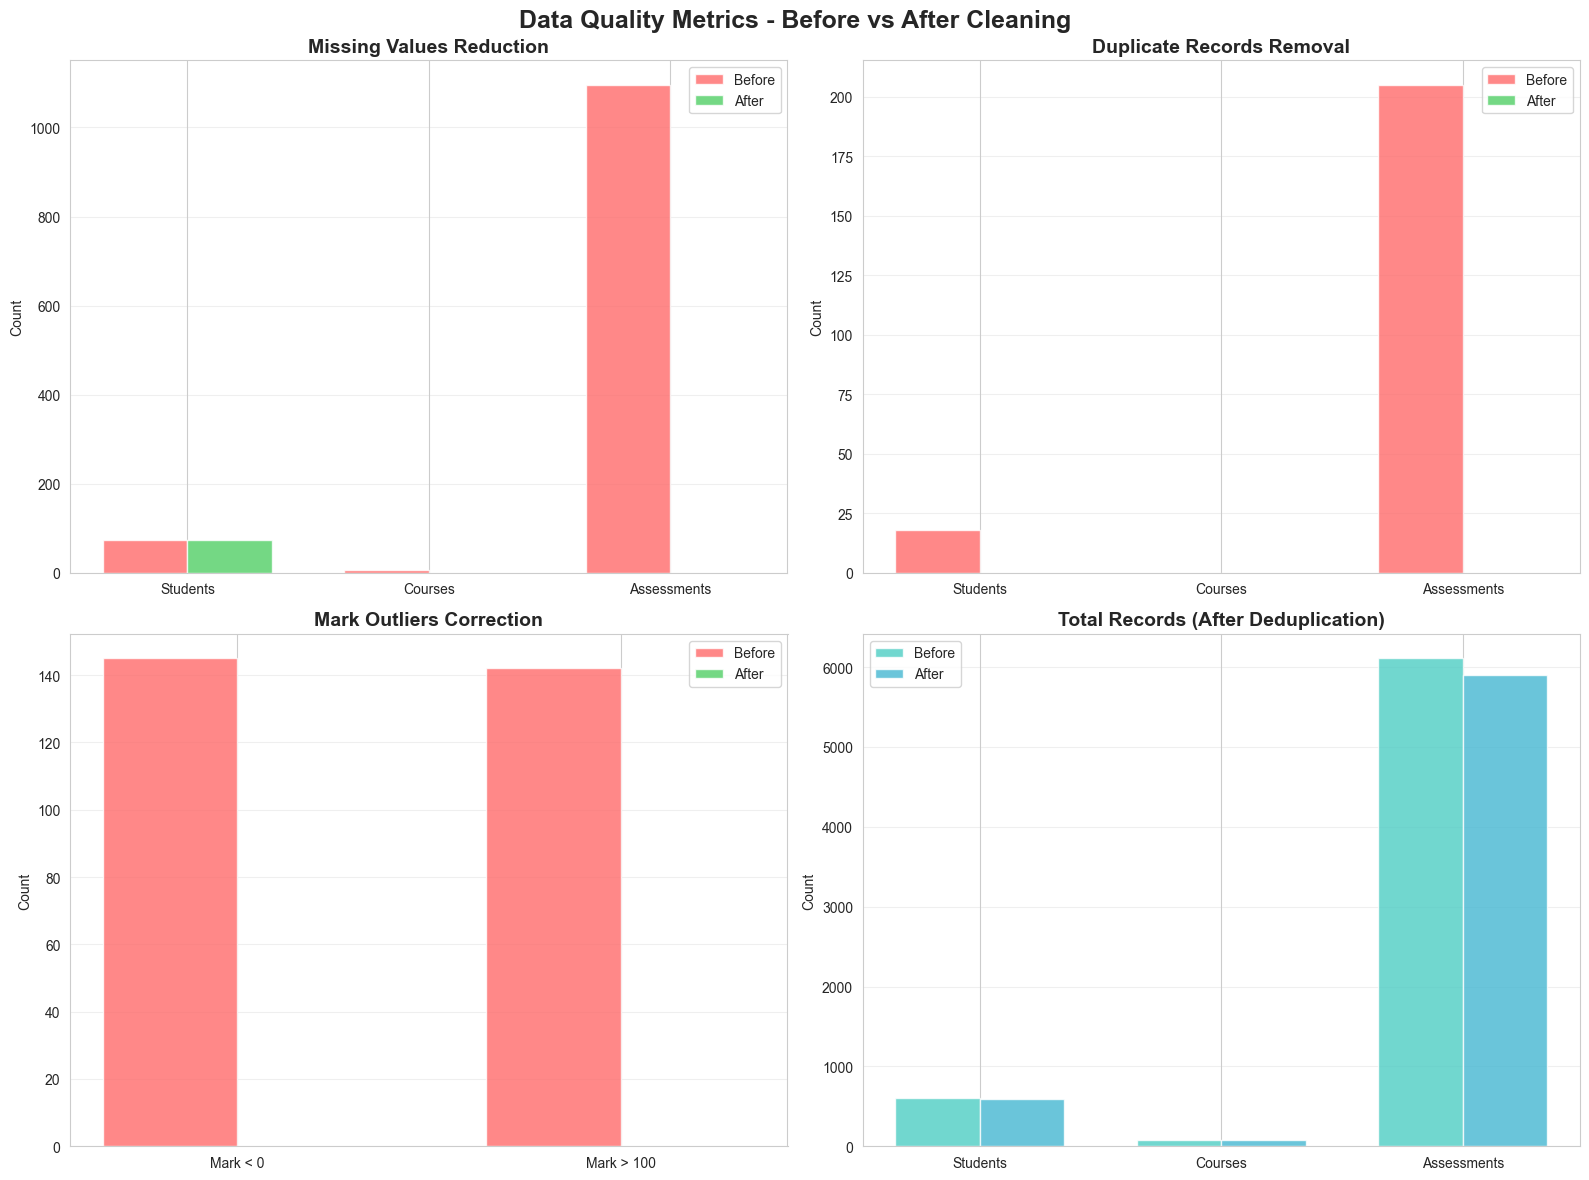

✓ Saved: outputs/02_before_after_comparison.png


In [25]:
# Create before/after visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Data Quality Metrics - Before vs After Cleaning', fontsize=18, fontweight='bold')

# Missing Values
missing_metrics = before_after_summary[before_after_summary['Metric'].str.contains('Missing')]
x = range(len(missing_metrics))
width = 0.35
axes[0, 0].bar([i - width/2 for i in x], missing_metrics['Before'], width, label='Before', color='#FF6B6B', alpha=0.8)
axes[0, 0].bar([i + width/2 for i in x], missing_metrics['After'], width, label='After', color='#51CF66', alpha=0.8)
axes[0, 0].set_title('Missing Values Reduction', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['Students', 'Courses', 'Assessments'], rotation=0)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Duplicates
dup_metrics = before_after_summary[before_after_summary['Metric'].str.contains('Duplicates')]
x = range(len(dup_metrics))
axes[0, 1].bar([i - width/2 for i in x], dup_metrics['Before'], width, label='Before', color='#FF6B6B', alpha=0.8)
axes[0, 1].bar([i + width/2 for i in x], dup_metrics['After'], width, label='After', color='#51CF66', alpha=0.8)
axes[0, 1].set_title('Duplicate Records Removal', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Students', 'Courses', 'Assessments'], rotation=0)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Outliers
outlier_metrics = before_after_summary[before_after_summary['Metric'].str.contains('Outliers')]
x = range(len(outlier_metrics))
axes[1, 0].bar([i - width/2 for i in x], outlier_metrics['Before'], width, label='Before', color='#FF6B6B', alpha=0.8)
axes[1, 0].bar([i + width/2 for i in x], outlier_metrics['After'], width, label='After', color='#51CF66', alpha=0.8)
axes[1, 0].set_title('Mark Outliers Correction', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Mark < 0', 'Mark > 100'], rotation=0)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Total Records
record_metrics = before_after_summary[before_after_summary['Metric'].str.contains('Total Records')]
x = range(len(record_metrics))
axes[1, 1].bar([i - width/2 for i in x], record_metrics['Before'], width, label='Before', color='#4ECDC4', alpha=0.8)
axes[1, 1].bar([i + width/2 for i in x], record_metrics['After'], width, label='After', color='#45B7D1', alpha=0.8)
axes[1, 1].set_title('Total Records (After Deduplication)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['Students', 'Courses', 'Assessments'], rotation=0)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/02_before_after_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: outputs/02_before_after_comparison.png")

---
## 7. SAVE CLEANED DATASETS

In [26]:
print("\n" + "="*60)
print("7. SAVING CLEANED DATASETS")
print("="*60)

# Save cleaned datasets
students_df.to_csv('outputs/students_cleaned.csv', index=False)
print("✓ Saved: outputs/students_cleaned.csv")

courses_df.to_csv('outputs/courses_cleaned.csv', index=False)
print("✓ Saved: outputs/courses_cleaned.csv")

assessments_df.to_csv('outputs/assessments_cleaned.csv', index=False)
print("✓ Saved: outputs/assessments_cleaned.csv")

print(f"\nFinal dataset sizes:")
print(f"  Students: {len(students_df)} records")
print(f"  Courses: {len(courses_df)} records")
print(f"  Assessments: {len(assessments_df)} records")


7. SAVING CLEANED DATASETS
✓ Saved: outputs/students_cleaned.csv
✓ Saved: outputs/courses_cleaned.csv
✓ Saved: outputs/assessments_cleaned.csv

Final dataset sizes:
  Students: 589 records
  Courses: 75 records
  Assessments: 5905 records


---
## 8. GENERATE CLEANING SUMMARY REPORT

In [27]:
# Generate comprehensive text report
with open('outputs/02_cleaning_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("DATA CLEANING SUMMARY REPORT\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("="*70 + "\n\n")
    
    f.write("CLEANING OPERATIONS PERFORMED:\n")
    f.write("-"*70 + "\n")
    f.write("1. Missing Data Imputation\n")
    f.write("   - Gender: Filled with mode (most common value)\n")
    f.write("   - Marks: Filled with median by course\n")
    f.write("   - Credits: Filled with median by program\n")
    f.write("   - Attendance: Filled with mean by campus\n")
    f.write("   - Phone/Email: Kept as NaN (not critical)\n\n")
    
    f.write("2. Duplicate Removal\n")
    f.write("   - Students: Removed duplicates by Student_ID (kept latest)\n")
    f.write("   - Courses: Removed duplicates by Course_Code + Campus\n")
    f.write("   - Assessments: Removed duplicates by key fields (kept latest)\n\n")
    
    f.write("3. Outlier Treatment\n")
    f.write("   - Marks: Capped to 0-100 range\n")
    f.write("   - Credits: Removed invalid (<= 0) values\n")
    f.write("   - Attendance: Capped to 0-100 range\n\n")
    
    f.write("4. Format Standardization\n")
    f.write("   - Dates: Converted to datetime format\n")
    f.write("   - Gender: Standardized to MALE/FEMALE\n")
    f.write("   - Course Codes: Uppercase, removed hyphens/spaces\n")
    f.write("   - Programs: Title Case\n")
    f.write("   - Campus Names: Title Case\n\n")
    
    f.write("5. Noise Removal\n")
    f.write("   - Names: Removed special characters\n")
    f.write("   - Text fields: Removed extra whitespace\n")
    f.write("   - Numeric fields: Validated ranges\n\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("BEFORE vs AFTER METRICS\n")
    f.write("="*70 + "\n\n")
    f.write(before_after_summary.to_string(index=False))
    f.write("\n\n")
    
    f.write("="*70 + "\n")
    f.write("FINAL DATA QUALITY STATUS\n")
    f.write("="*70 + "\n")
    f.write(f"Students Dataset: {len(students_df)} records\n")
    f.write(f"  - Missing values: {students_df.isnull().sum().sum()}\n")
    f.write(f"  - Duplicates: {students_df.duplicated(subset=['Student_ID']).sum()}\n\n")
    
    f.write(f"Courses Dataset: {len(courses_df)} records\n")
    f.write(f"  - Missing values: {courses_df.isnull().sum().sum()}\n")
    f.write(f"  - Duplicates: {courses_df.duplicated(subset=['Course_Code', 'Campus_Name']).sum()}\n\n")
    
    f.write(f"Assessments Dataset: {len(assessments_df)} records\n")
    f.write(f"  - Missing values: {assessments_df.isnull().sum().sum()}\n")
    f.write(f"  - Duplicates: {assessments_df.duplicated(subset=['Student_ID', 'Course_Code', 'Academic_Year', 'Semester', 'Assessment_Type']).sum()}\n")
    f.write(f"  - Invalid marks: {((assessments_df['Mark'] < 0) | (assessments_df['Mark'] > 100)).sum()}\n")

print("\n✓ Saved: outputs/02_cleaning_summary_report.txt")


✓ Saved: outputs/02_cleaning_summary_report.txt


---
## PHASE 2 COMPLETE! ✅

### Deliverables Created:
1. **Cleaned Datasets:**
   - `outputs/students_cleaned.csv`
   - `outputs/courses_cleaned.csv`
   - `outputs/assessments_cleaned.csv`

2. **Reports:**
   - `outputs/02_before_after_report.csv`
   - `outputs/02_cleaning_summary_report.txt`

3. **Visualizations:**
   - `outputs/02_missing_values_before.png`
   - `outputs/02_outliers_before.png`
   - `outputs/02_before_after_comparison.png`

### Next Step:
Run **Phase 3: Transformation** (`03_transformation.ipynb`)

In [28]:
print("\n" + "="*60)
print("PHASE 2 COMPLETE!")
print("="*60)
print("\nNext step: Run 03_transformation.ipynb")
print("\nAll cleaned datasets and reports saved to outputs/ folder")


PHASE 2 COMPLETE!

Next step: Run 03_transformation.ipynb

All cleaned datasets and reports saved to outputs/ folder
